<a href="https://colab.research.google.com/github/samvillasmith/EDA/blob/main/categorical_numerical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
telco_base_data = pd.read_csv('/content/churn_modeling1.csv')

## Univariate Analysis

Univariate analysis is a type of data analysis that involves examining a single variable at a time. It is used to understand the distribution of values within a variable, identify central tendencies, and detect outliers. This type of analysis provides insights into the characteristics of individual variables without considering their relationships with other variables.

In [23]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
telco_new = telco_base_data[['Geography', 'Gender', 'Exited']]

In [25]:
telco_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


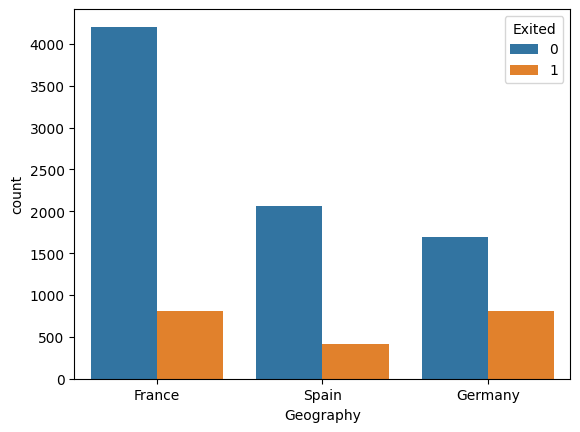

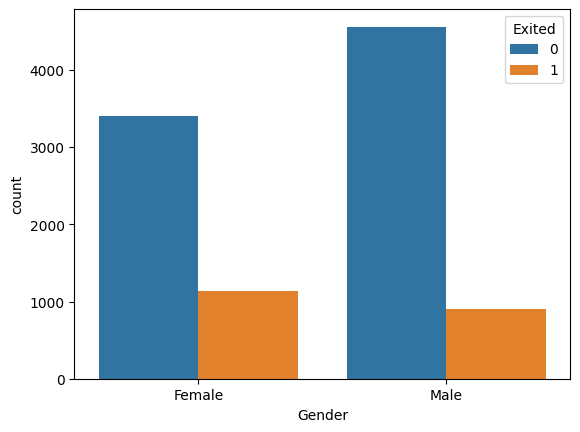

In [26]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=telco_new, x=predictor, hue='Exited')

In [27]:
telco_new.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [28]:
telco_new.Exited.value_counts()/len(telco_new)*100

,count
Exited,
0,79.63
1,20.37


## Bivariate Analysis

Bivariate analysis is a statistical method used to explore the relationship between two variables. It helps in understanding how changes in one variable are associated with changes in another. Common techniques include scatter plots, correlation coefficients, and cross-tabulations.

<Axes: xlabel='Gender', ylabel='Count'>

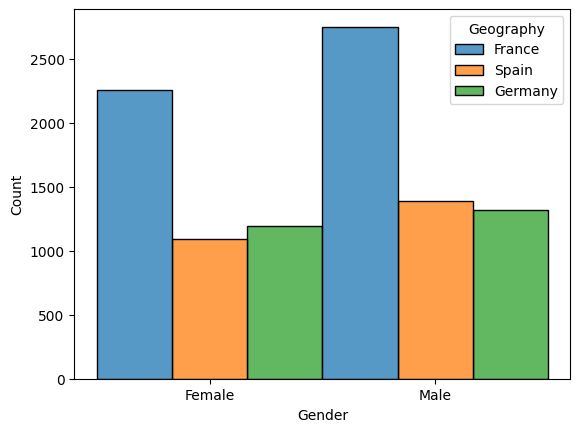

In [29]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat='count', multiple='dodge')

In [30]:
telco_new_target1 = telco_new[telco_new['Exited'] == 1]

## Numerical Analysis

### Correlation
Correlation is a statistical measure that describes the extent to which two variables are linearly related. It indicates the strength and direction of the relationship. A positive correlation means that as one variable increases, the other tends to increase as well. A negative correlation means that as one variable increases, the other tends to decrease. A correlation coefficient ranges from -1 to +1, where:

+1 indicates a perfect positive linear correlation
-1 indicates a perfect negative linear correlation
0 indicates no linear correlation

In [31]:
telco_base_data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

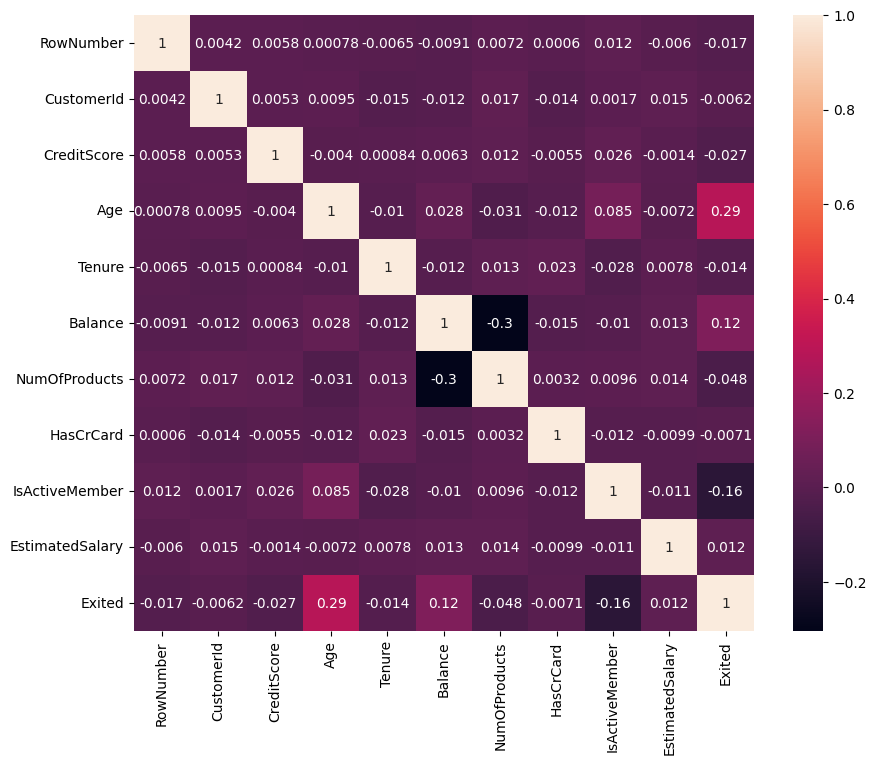

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(telco_base_data.corr(numeric_only=True), annot=True)

<Axes: >

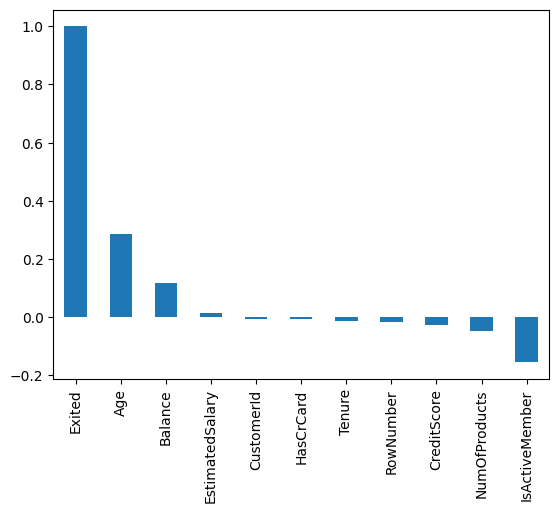

In [33]:
telco_base_data.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

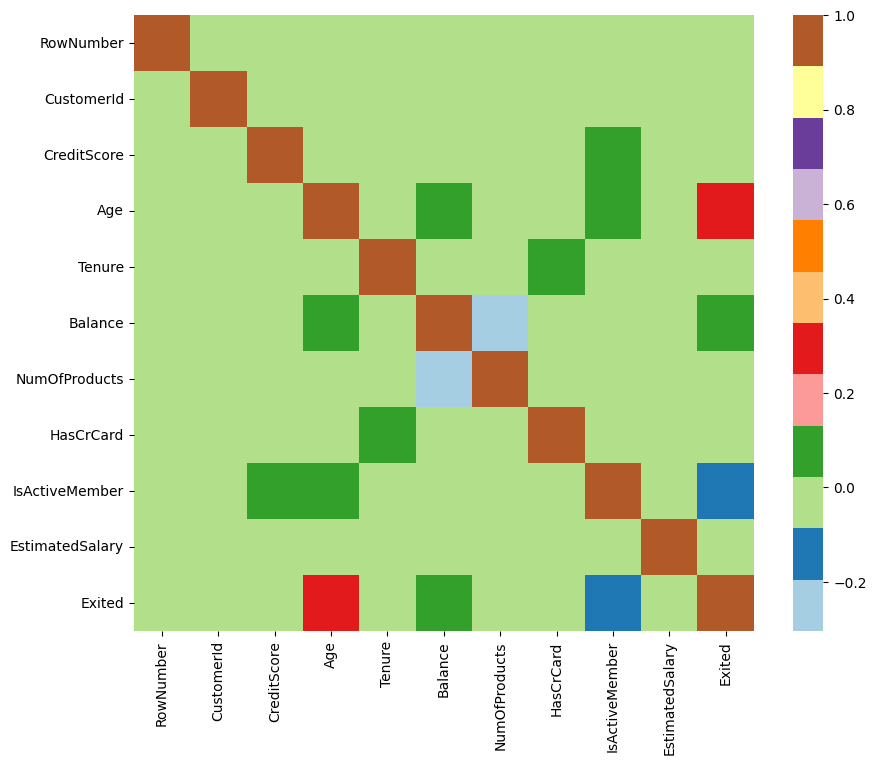

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(telco_base_data.corr(numeric_only=True), cmap='Paired')

In [35]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age'>

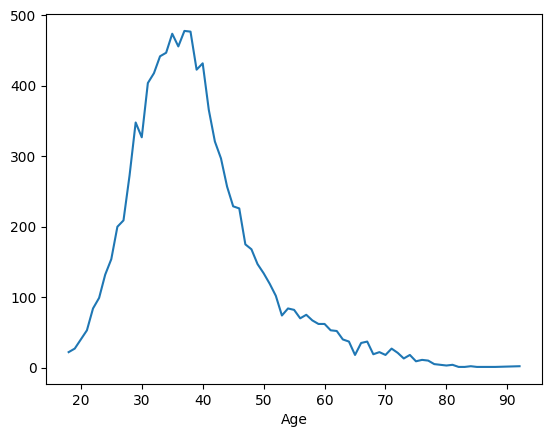

In [40]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

In [41]:
telco_base_data1 = telco_base_data.loc[telco_base_data['Exited']==1]

<Axes: xlabel='Age'>

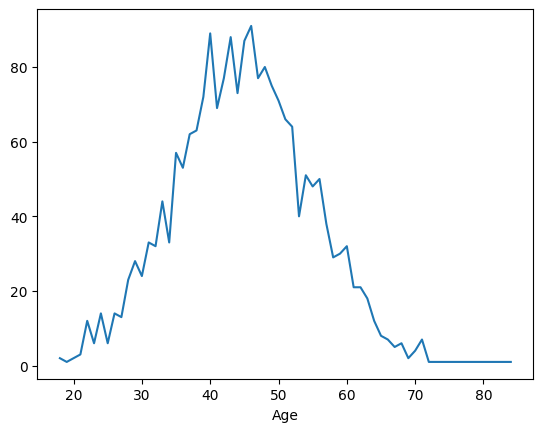

In [42]:
telco_base_data1['Age'].value_counts().sort_index(ascending=True).plot()

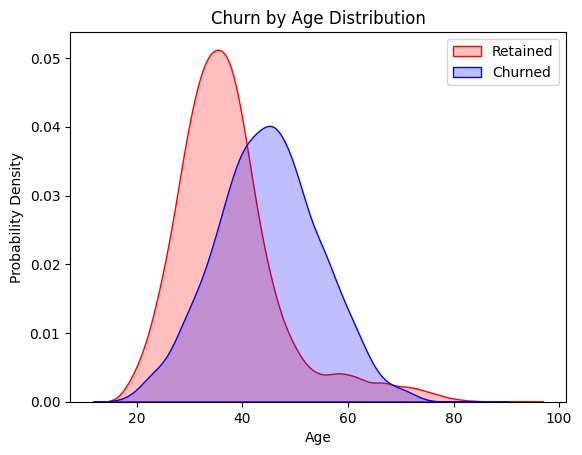

In [43]:
Tot = sns.kdeplot(
    data=telco_base_data[telco_base_data['Exited'] == 0],
    x="Age",
    color="red",
    shade=True
)

Tot = sns.kdeplot(
    data=telco_base_data[telco_base_data['Exited'] == 1],
    x="Age",
    color="blue",
    shade=True
)

Tot.legend(["Retained", "Churned"], loc="upper right")
Tot.set_ylabel("Probability Density")
Tot.set_xlabel("Age")
Tot.set_title("Churn by Age Distribution")
plt.show()

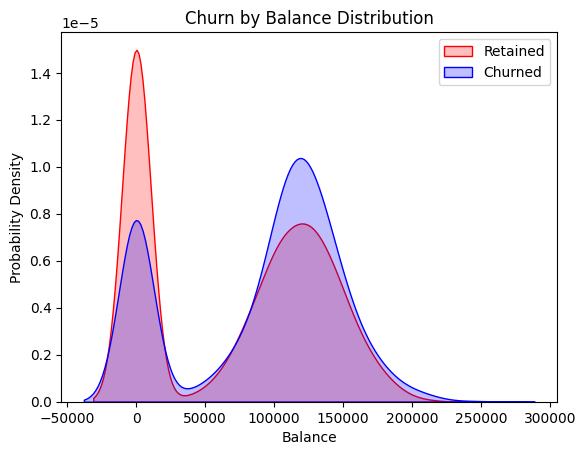

In [44]:
Tot = sns.kdeplot(
    data=telco_base_data[telco_base_data['Exited'] == 0],
    x="Balance",
    color="red",
    shade=True
)

Tot = sns.kdeplot(
    data=telco_base_data[telco_base_data['Exited'] == 1],
    x="Balance",
    color="blue",
    shade=True
)

Tot.legend(["Retained", "Churned"], loc="upper right")
Tot.set_ylabel("Probability Density")
Tot.set_xlabel("Balance")
Tot.set_title("Churn by Balance Distribution")
plt.show()